In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import random_split

import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid

import time

In [2]:
data_path = r"C:\Users\prana\Downloads\Garbage classification-20211118T044150Z-001\Garbage classification"

In [3]:
img_size = 120

In [4]:
img_transform = transforms.Compose([transforms.Resize((img_size, img_size)),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
                                   ])

In [5]:
img_data = ImageFolder(root=data_path, transform = img_transform)

In [6]:
img_data.class_to_idx

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [7]:
img_data.classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [8]:
len(img_data)

2527

In [9]:
train_data, test_data, val_data = random_split(img_data, [1800,100,627])

In [10]:
len(train_data)

1800

In [11]:
train_loader = DataLoader(train_data, batch_size = 32, shuffle=True)
val_loader = DataLoader(val_data, batch_size = 32, shuffle = False)

In [12]:
for images, labels in train_loader:
    print(images.shape)
    break

torch.Size([32, 3, 120, 120])


In [13]:
def show_img_batch(data):
    for images, labels in data:
        plt.figure(figsize=(16,10))
        plt.imshow(make_grid(images,n_row=20).permute(1,2,0))
        plt.show()
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


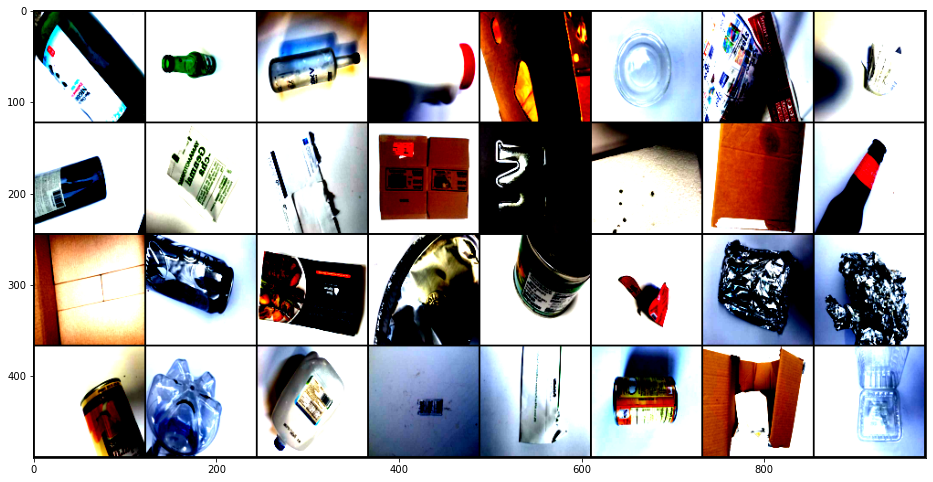

In [14]:
show_img_batch(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


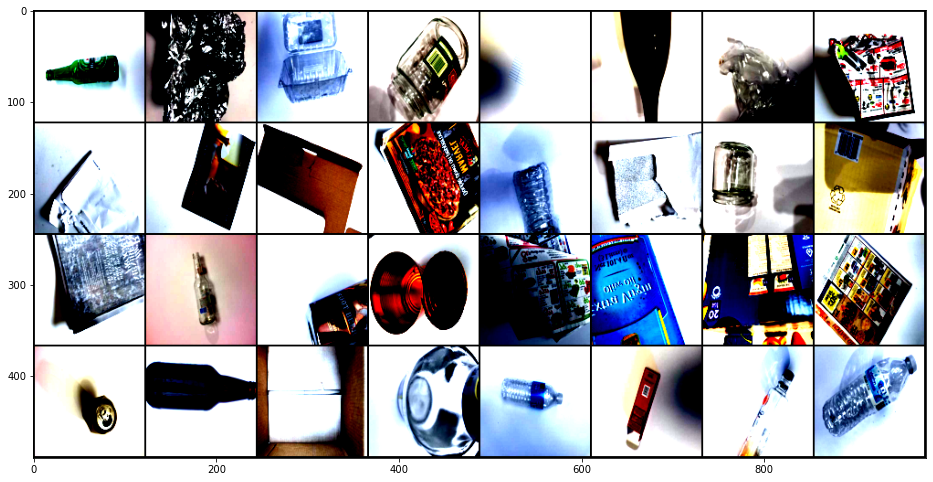

In [15]:
show_img_batch(val_loader)

In [16]:
class ANN(nn.Module):
    
    def __init__(self, hidden_layer1=128, hidden_layer2=64):
        super(ANN, self).__init__()
        
        self.hidden_layer1 = hidden_layer1
        self.hidden_layer2 = hidden_layer2
        
        self.fc1 = nn.Linear(img_size*img_size*3, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.fc3 = nn.Linear(hidden_layer2, 6)
        
        self.relu = nn.ReLU()
        
    def forward(self, img):
        
        out = img.view(-1, img_size*img_size*3)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        
        return out

In [17]:
model = ANN()
print(model.parameters)

<bound method Module.parameters of ANN(
  (fc1): Linear(in_features=43200, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=6, bias=True)
  (relu): ReLU()
)>


In [18]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [19]:
def ANN_train(loss_fn, optimizer):
    
    epochs = 20
    
    training_loss =[]
    training_acc = []
    testing_loss = []
    testing_acc = []
    
    for epoch in range(epochs):
        
        train_loss = 0.0
        train_acc = 0.0
        
        model.train()
        
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = loss_fn(output, labels)
            
            loss.backward()
            optimizer.step()
            
            predictions = torch.argmax(output, 1)
            
            train_acc += (predictions == labels).sum().item()
            train_loss += loss.item()
            
        training_acc.append(train_acc/len(train_data))
        training_loss.append(train_loss/len(train_loader))
        
        test_loss = 0.0
        test_acc = 0.0
        
        model.eval()
        
        with torch.no_grad():
            
            for images, labels in val_loader:
                output = model(images)
                loss = loss_fn(output, labels)
                
                predictions = torch.argmax(output,1)
                
                test_acc += (predictions == labels).sum().item()
                test_loss += loss.item()
                
            testing_acc.append(test_acc/len(val_data))
            testing_loss.append(test_loss/len(val_loader))
            
            print("Epochs:{}, Training Accuracy:{:.2f}, Training Loss:{:.2f}, Validation Accuracy:{:.2f}, Validation Loss:{:.2f}".
                  format(epoch+1,train_acc/len(train_data),train_loss/len(train_loader),
                        test_acc/len(val_data),train_loss/len(train_loader) ))
            
    plt.title("Accuracy Vs Epochs")
    plt.plot(range(epochs), training_acc, label="Training Accuracy")
    plt.plot(range(epochs), testing_acc, label="Validation Accuracy")
    plt.legend()
    plt.xlabel("Accuracy")
    plt.ylabel("Epochs")
    plt.show()


    plt.title("Loss Vs Epochs")
    plt.plot(range(epochs), training_loss, label="Training Loss")
    plt.plot(range(epochs), testing_loss, label="Validation Loss")
    plt.legend()
    plt.xlabel("Loss")
    plt.ylabel("Epochs")
    plt.show()    

Epochs:1, Training Accuracy:0.28, Training Loss:1.67, Validation Accuracy:0.37, Validation Loss:1.67
Epochs:2, Training Accuracy:0.39, Training Loss:1.57, Validation Accuracy:0.36, Validation Loss:1.57
Epochs:3, Training Accuracy:0.45, Training Loss:1.50, Validation Accuracy:0.48, Validation Loss:1.50
Epochs:4, Training Accuracy:0.47, Training Loss:1.44, Validation Accuracy:0.41, Validation Loss:1.44
Epochs:5, Training Accuracy:0.48, Training Loss:1.40, Validation Accuracy:0.51, Validation Loss:1.40
Epochs:6, Training Accuracy:0.50, Training Loss:1.37, Validation Accuracy:0.51, Validation Loss:1.37
Epochs:7, Training Accuracy:0.50, Training Loss:1.35, Validation Accuracy:0.49, Validation Loss:1.35
Epochs:8, Training Accuracy:0.52, Training Loss:1.32, Validation Accuracy:0.52, Validation Loss:1.32
Epochs:9, Training Accuracy:0.52, Training Loss:1.30, Validation Accuracy:0.47, Validation Loss:1.30
Epochs:10, Training Accuracy:0.53, Training Loss:1.29, Validation Accuracy:0.43, Validation

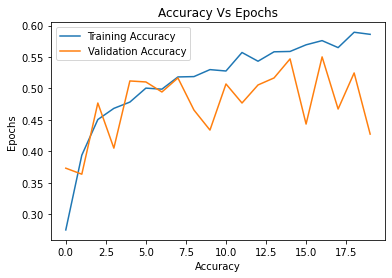

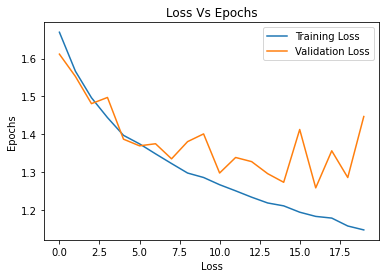

In [20]:
ANN_train(loss_fn, optimizer)

In [24]:
def predict_image( img, model):
    x = img.unsqueeze(0)
    y = model(x)
    
    pred = torch.argmax(y, dim=1)
    
    return img_data.classes[pred]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual Label: metal Predicted Label: metal


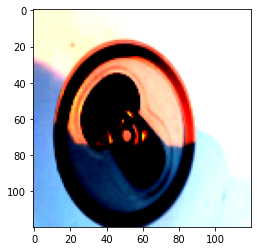

In [25]:
img, label = test_data[10]
plt.imshow(img.permute(1,2,0))
print("Actual Label:", img_data.classes[label], "Predicted Label:", predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual Label: paper Predicted Label: paper


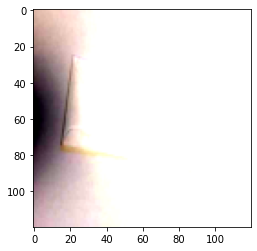

In [27]:
img, label = test_data[2]
plt.imshow(img.permute(1,2,0))
print("Actual Label:", img_data.classes[label], "Predicted Label:", predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual Label: glass Predicted Label: glass


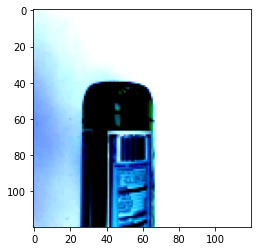

In [28]:
img, label = test_data[22]
plt.imshow(img.permute(1,2,0))
print("Actual Label:", img_data.classes[label], "Predicted Label:", predict_image(img, model))